In [1]:
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline 
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv("Credit_Risk_data.csv") 
test=pd.read_csv("Credit_Risk_data.csv")

# Understanding the Data


In [3]:
#We have 12 independent variables and 1 target variable, 
#i.e. Loan_Status in the training dataset.
#Let’s look at the columns of the test dataset.

train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
#We have similar features in the test dataset as the training dataset except for the Loan_Status.
#We will predict the Loan_Status using the model built using the train data.
# Given below is the description for each variable.

train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
# Print data types for each variable
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
#We can see there are three formats of data types:

#object: Object format means variables are categorical. Categorical variables in our dataset are: Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status
#int64: It represents the integer variables. ApplicantIncome is of this format.
#float64: It represents the variable that has some decimal values involved. They are also numerical variables. Numerical variables in our dataset are: CoapplicantIncome, LoanAmount, Loan_Amount_Term, and Credit_History


In [7]:
train.shape, test.shape

((614, 13), (614, 13))

In [8]:
#Target Variable
#The frequency table of a variable will give us the count of each category in that variable.

train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

<AxesSubplot:>

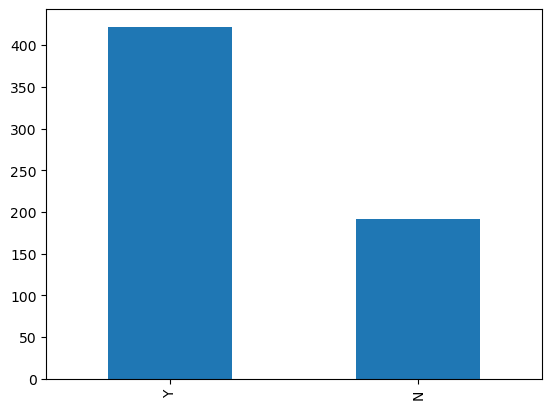

In [9]:
train['Loan_Status'].value_counts().plot.bar()

#422(around 69%) people out of 614 got the approval.

# Independent Variable (Categorical)

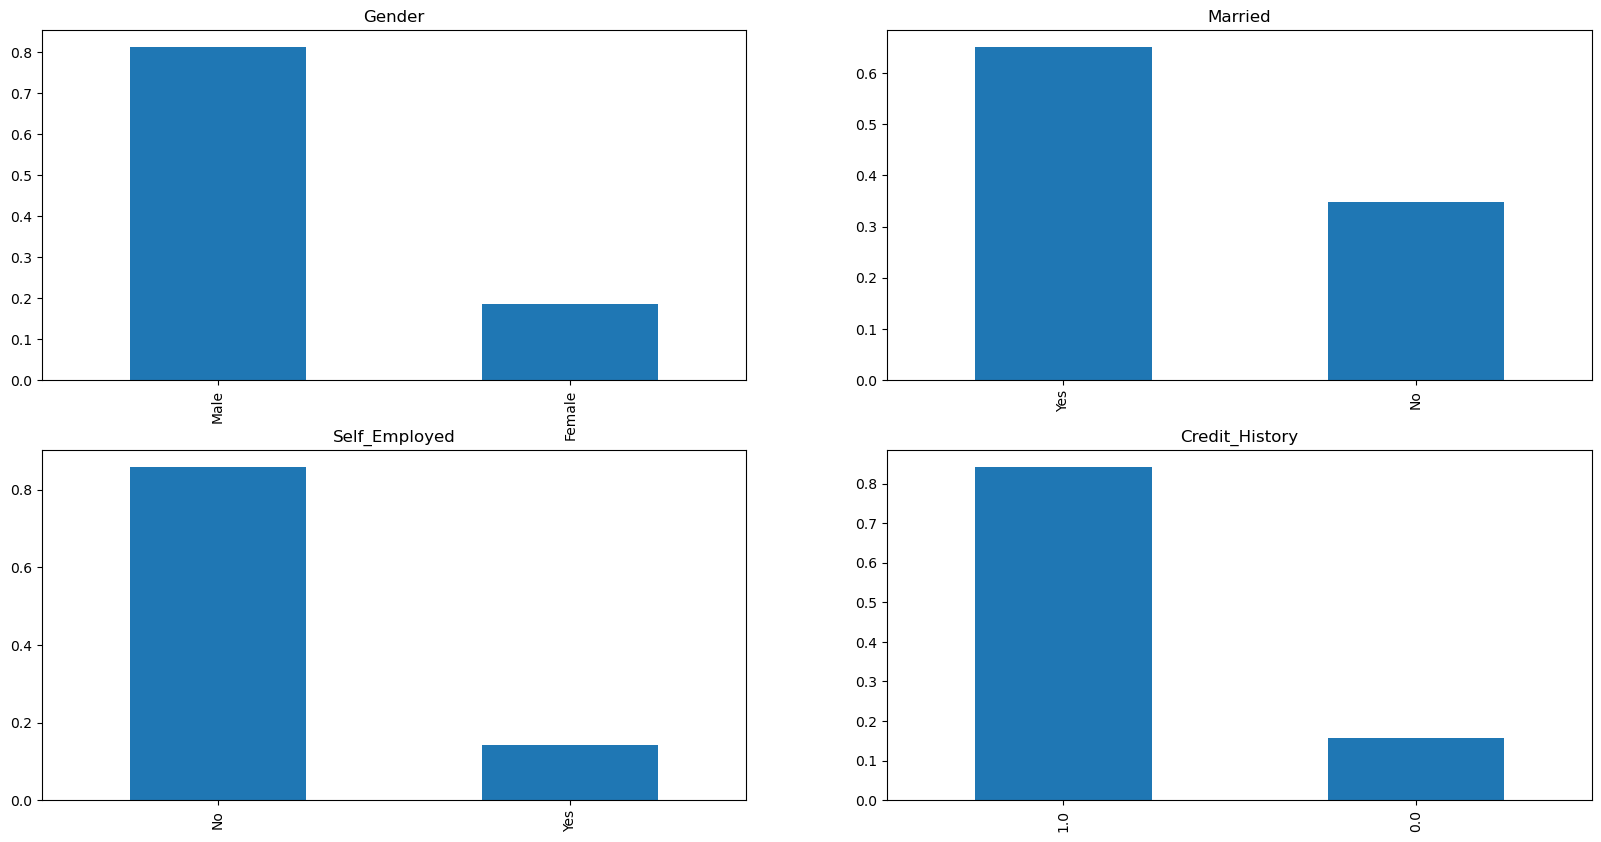

In [10]:
plt.subplot(221) 
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender') 
plt.subplot(222) 
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 
plt.subplot(223) 
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 
plt.subplot(224) 
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 
plt.show()

In [11]:
#  It can be inferred from the above bar plots that:

#  80% of applicants in the dataset are male.
#  Around 65% of the applicants in the dataset are married.
#  About 15% of applicants in the dataset are self-employed.
#  About 85% of applicants have repaid their debts.
#  Now let’s visualize the ordinal variables.

# Independent Variable (Ordinal)

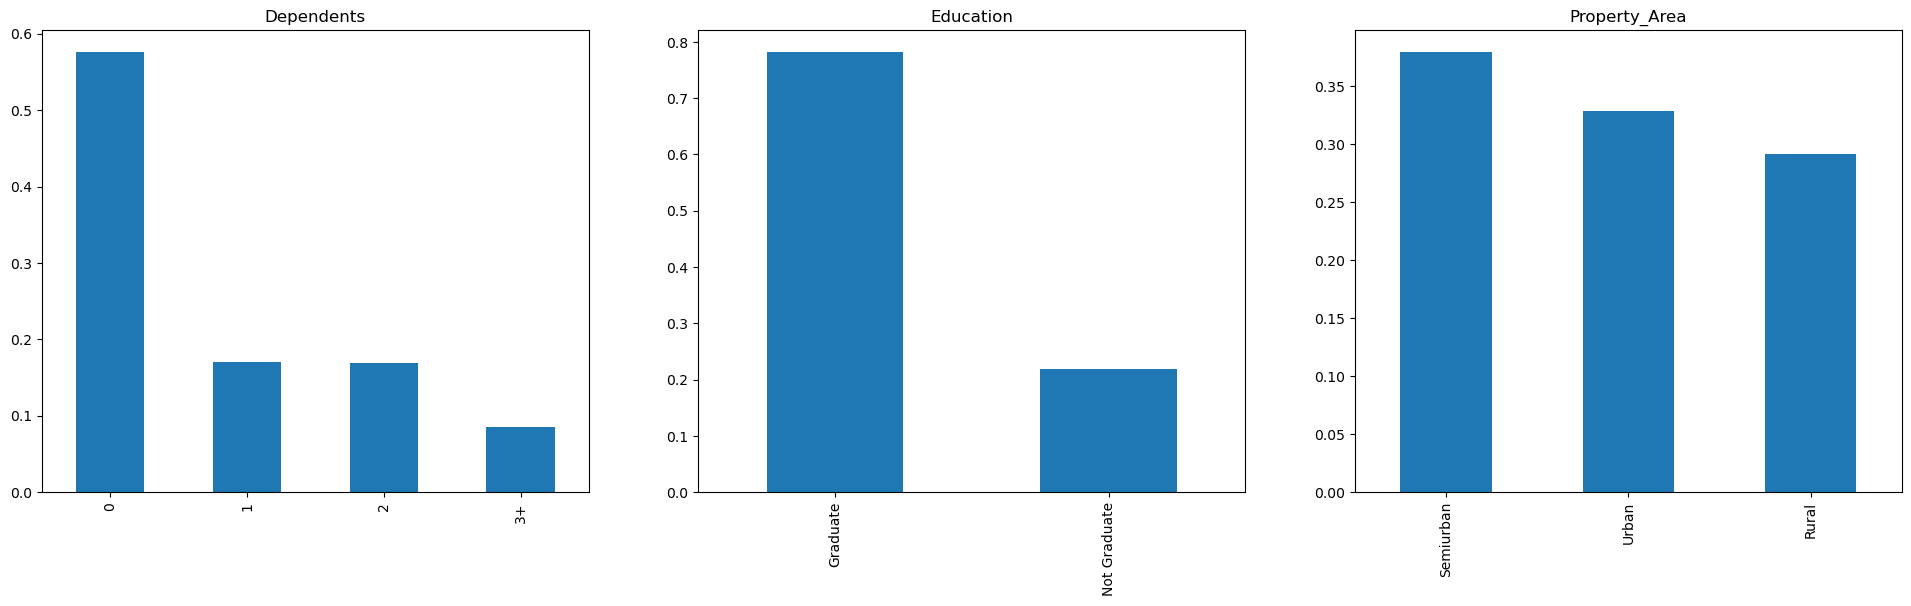

In [12]:
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Dependents') 
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 
plt.subplot(133) 
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 
plt.show()

In [13]:
#  Following inferences can be made from the above bar plots:

#  Most of the applicants don’t have dependents.
#  About 80% of the applicants are graduates.
#  Most of the applicants are from semi-urban areas.

# Independent Variable (Numerical)

In [14]:
# Till now we have seen the categorical and ordinal variables and now let’s visualize the numerical variables.
# Let’s look at the distribution of Applicant income first.

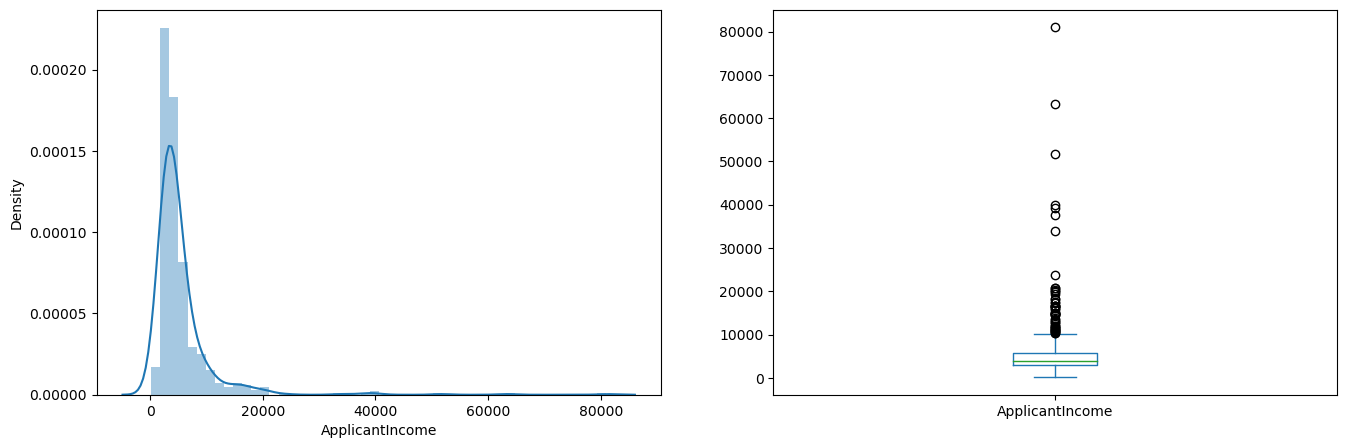

In [15]:
plt.subplot(121) 
sns.distplot(train['ApplicantIncome']); 
plt.subplot(122) 
train['ApplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

In [16]:
# It can be inferred that most of the data in the distribution of applicant income are towards the left,
#which means it is not normally distributed. 
#We will try to make it normal in later sections as algorithms work better if the data is normally distributed.

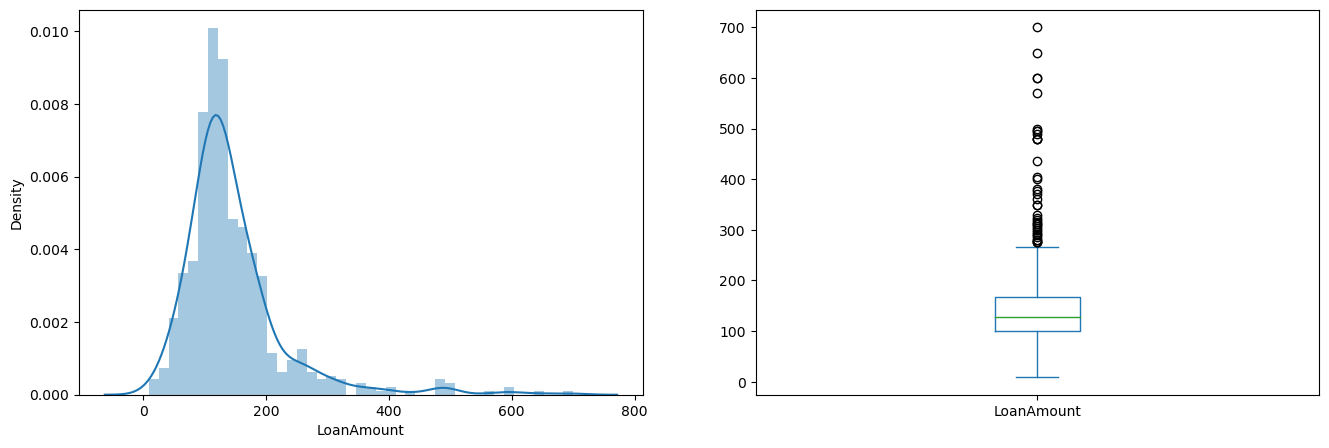

In [17]:
#Let’s look at the distribution of the LoanAmount variable.

plt.subplot(121)
df=train.dropna()
sns.distplot(train['LoanAmount']); 
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5)) 
plt.show()



# We see a lot of outliers in this variable and the distribution is fairly normal.

<AxesSubplot:xlabel='Gender'>

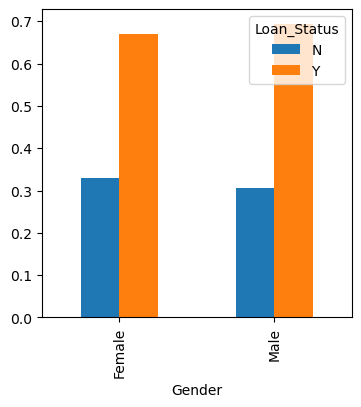

In [18]:
#  Categorical Independent Variable vs Target Variable

Gender=pd.crosstab(train['Gender'],train['Loan_Status']) 
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4))


# It can be inferred that the proportion of male and female applicants is more or less the same for
# both approved and unapproved loans.

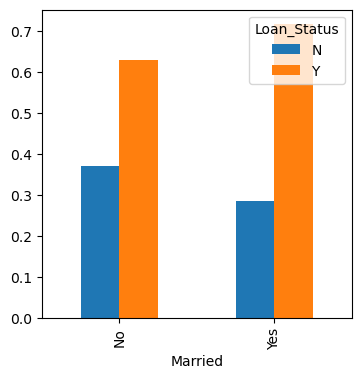

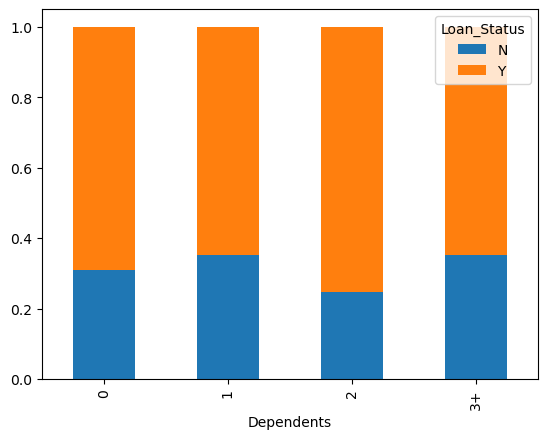

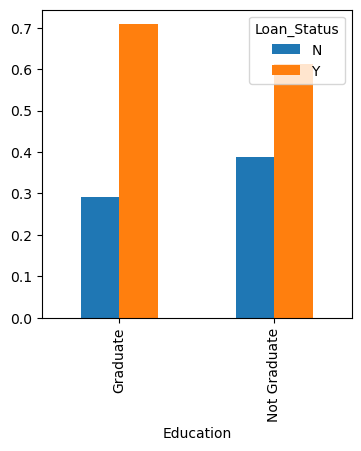

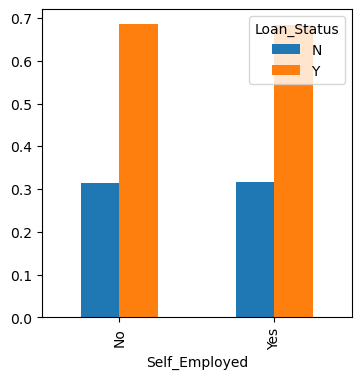

In [19]:
#  Now let us visualize the remaining categorical variables vs the target variables.

Married=pd.crosstab(train['Married'],train['Loan_Status']) 
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status']) 
Education=pd.crosstab(train['Education'],train['Loan_Status']) 
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status']) 
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4)) 
plt.show() 
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show() 
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4)) 
plt.show() 
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="bar",figsize=(4,4))
plt.show()

In [20]:
# The proportion of married applicants is higher for the approved loans.
# The distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.
# There is nothing significant we can infer from Self_Employed vs Loan_Status plot.

# Heatmaps

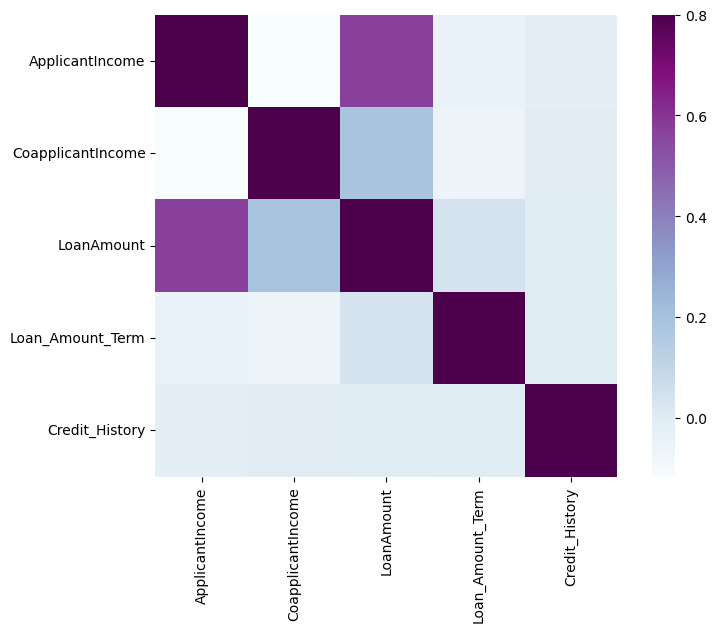

In [21]:
# Now let’s look at the correlation between all the numerical variables.
# We will use the heat map to visualize the correlation. 
# Heatmaps visualize data through variations in coloring. 
#The variables with darker colors mean their correlation is more.

matrix = train.corr() 
ax = plt.subplots(figsize=(9, 6)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

# Missing Value and Outlier Treatment

In [22]:

train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [23]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)



In [24]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

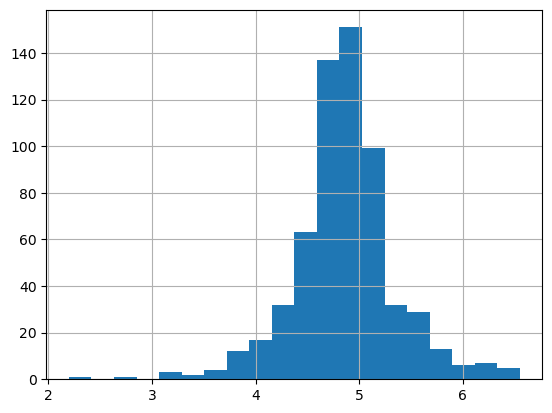

In [25]:
#Let’s visualize the effect of log transformation. We will do similar changes to the test data simultaneously.

train['LoanAmount_log'] = np.log(train['LoanAmount']) 
train['LoanAmount_log'].hist(bins=20) 
test['LoanAmount_log'] = np.log(test['LoanAmount'])



# Now the distribution looks much closer to normal and the effect of extreme values has been significantly subsided.
# Let’s build a logistic regression model and make predictions for the test dataset.

# logistic regression

In [26]:
#train=train.drop('Loan_ID',axis=1) 
#test=test.drop('Loan_ID',axis=1)

X = train.drop('Loan_Status',1) 
y = train.Loan_Status

X=pd.get_dummies(X) 
train=pd.get_dummies(train) 
test=pd.get_dummies(test)




from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score


LogisticRegression()

In [53]:
# Create a logistic regression model and fit it to the training data
model = LogisticRegression()
model.fit(x_train, y_train)

# Use the model to make predictions on the test data
y_pred = model.predict(x_train)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_train, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.8275058275058275


# KNeighborsClassifier

In [27]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train)  

KNeighborsClassifier()

In [58]:
# Make predictions on the test set
y_pred = classifier.predict(x_train)

# Evaluate the accuracy of the classifier
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9883449883449883


# GaussianNB

In [28]:
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(x_train, y_train)  

GaussianNB()

In [59]:
# Make predictions on the test set
y_pred = classifier.predict(x_train)

# Evaluate the accuracy of the classifier
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9883449883449883


In [31]:
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

In [32]:
train

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Loan_ID_LP001002,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,5849,0.0,128.0,360.0,1.0,4.852030,1,0,0,0,...,0,1,0,1,0,0,0,1,0,1
1,4583,1508.0,128.0,360.0,1.0,4.852030,0,1,0,0,...,0,1,0,1,0,1,0,0,1,0
2,3000,0.0,66.0,360.0,1.0,4.189655,0,0,1,0,...,0,1,0,0,1,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,4.787492,0,0,0,1,...,0,0,1,1,0,0,0,1,0,1
4,6000,0.0,141.0,360.0,1.0,4.948760,0,0,0,0,...,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,4.262680,0,0,0,0,...,0,1,0,1,0,1,0,0,0,1
610,4106,0.0,40.0,180.0,1.0,3.688879,0,0,0,0,...,1,1,0,1,0,1,0,0,0,1
611,8072,240.0,253.0,360.0,1.0,5.533389,0,0,0,0,...,0,1,0,1,0,0,0,1,0,1
612,7583,0.0,187.0,360.0,1.0,5.231109,0,0,0,0,...,0,1,0,1,0,0,0,1,0,1


# RandomForestClassifier

In [33]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 15, criterion="entropy")  
classifier.fit(x_train, y_train) 

RandomForestClassifier(criterion='entropy', n_estimators=15)

In [34]:
# Use the trained model to make predictions on the test data
y_pred = classifier.predict(x_train)

# Print the predicted labels
(y_pred)


array(['Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'Y', 'Y',
       'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'Y', 'N', 'N',
       'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y

In [60]:
# Make predictions on the test set
#y_pred = classifier.predict(x_test)

# Evaluate the accuracy of the classifier
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9883449883449883


# Confusion Matrix

In [36]:
'''It is a matrix with four cells that summarize the counts of true positives (TP),
true negatives (TN), 
false positives (FP), and 
false negatives (FN) produced by a classification algorithm.''' 

'It is a matrix with four cells that summarize the counts of true positives (TP),\ntrue negatives (TN), \nfalse positives (FP), and \nfalse negatives (FN) produced by a classification algorithm.'

In [37]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_train, y_pred)  

In [38]:
cm

array([[123,   5],
       [  0, 301]], dtype=int64)

In [39]:
 '''           Actual
          Positive Negative
Predicted
Positive    TP       FP
Negative    FN       TN


SyntaxError: EOF while scanning triple-quoted string literal (424355820.py, line 5)

In [ ]:
TP=132
TN=294
FN=0
FP= 3

In [ ]:
# Accuracy: The proportion of correct predictions out of all predictions.
accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy


In [ ]:
#Precision: The proportion of true positives out of all predicted positives.
precision = TP / (TP + FP)
precision

In [ ]:
#Recall: The proportion of true positives out of all actual positives.
recall = TP / (TP + FN)
recall

In [ ]:
#F1-score: The harmonic mean of precision and recall.
F1score = 2 * precision * recall / (precision + recall)
F1score

In [ ]:
'''The final result of a confusion matrix is not a single number, 
but rather a set of performance metrics
that provide different insights into the quality of the classification model.'''